In [20]:
# Import packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
import gensim
from gensim import corpora
from gensim import models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import cv2
import os
from selenium import webdriver
import time
import datetime
from nltk.stem.porter import PorterStemmer
import pyLDAvis
import pyLDAvis.gensim
from textblob import TextBlob
import textblob
from PIL import Image  
import PIL

In [2]:
#!pip install textblob
#nltk.download('brown')
#nltk.download('reuters')
#from textblob import download_corpora

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\65961\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [3]:
# Import dataset
data = pd.read_csv('today_news_scraper_article_v3_20201226174643.csv')

In [4]:
data.head()

Title     Type  \
0  REUTERS10 new Covid-19 infections in Singapore...  hotnews   
1  Covid-19 not likely to be eradicated like Sars...  hotnews   
2  MOH orders Concord International Hospital to s...  hotnews   
3  WP’s Yee Jenn Jong hopes new book will spark m...  hotnews   
4  2,950 more spaces for Friday Muslim prayers fr...  hotnews   

                            URL  \
0  https://www.todayonline.com/   
1  https://www.todayonline.com/   
2  https://www.todayonline.com/   
3  https://www.todayonline.com/   
4  https://www.todayonline.com/   

                                                HREF   Name        Date  \
0               /singapore/new-covid-19-cases-dec-26  today  2020-12-26   
1  /singapore/covid-19-not-likely-be-eradicated-s...  today  2020-12-26   
2  /singapore/moh-orders-concord-international-ho...  today  2020-12-26   
3  /singapore/wps-yee-jenn-jong-hopes-new-book-wi...  today  2020-12-26   
4  /singapore/2950-more-spaces-friday-muslim-pray...  today  2020-12-26   

              Datetime                                               Link  \
0  2020-12-26 17:32:11  https://www.todayonline.com/singapore/new-covi...   
1  2020-12-26 17:32:11  https://www.todayonline.com/singapore/covid-19...   
2  2020-12-26 17:32:11  https://www.todayonline.com/singapore/moh-orde...   
3  2020-12-26 17:32:11  https://www.todayonline.com/singapore/wps-yee-...   
4  2020-12-26 17:32:11  https://www.todayonline.com/singapore/2950-mor...   

                                             Article  
0  SINGAPORE — Singapore reported 10 new cases of...  
1  SINGAPORE — A new year is in sight but old pra...  
2  SINGAPORE — The Ministry of Health (MOH) said ...  
3  SINGAPORE — In 2012, one year after Workers' P...  
4  SINGAPORE — From Jan 1, a total of 18 more mos...

In [5]:
# Preprocess function
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in (stopwords.words('english') + ['singapore', 'moh', 'hour', 'ago', 'hours', 'today', 'days', 'day']) :
            result.append(token.lower())
    return result

In [6]:
# Remove punctuation
def remove_punctuation(text):
    result = []
    for item in text:
        removed_punc = [char for char in item if char not in string.punctuation]
        removed_punc_join = ''.join(removed_punc)
        removed_punc_join2 = ''.join(x for x in removed_punc_join if x.isalpha() or x == ' ')
        removed_punc_join3 = ''.join(removed_punc_join2)
        result.append(removed_punc_join3)
    return result

In [7]:
data['Article2'] = data['Article'].apply(lambda x: str(x))
data['Article3'] = data['Article2'].apply(preprocess)
data['Article4'] = data['Article3'].apply(remove_punctuation).apply(lambda x: ' '.join(x))

In [8]:
data.head()

Title     Type  \
0  REUTERS10 new Covid-19 infections in Singapore...  hotnews   
1  Covid-19 not likely to be eradicated like Sars...  hotnews   
2  MOH orders Concord International Hospital to s...  hotnews   
3  WP’s Yee Jenn Jong hopes new book will spark m...  hotnews   
4  2,950 more spaces for Friday Muslim prayers fr...  hotnews   

                            URL  \
0  https://www.todayonline.com/   
1  https://www.todayonline.com/   
2  https://www.todayonline.com/   
3  https://www.todayonline.com/   
4  https://www.todayonline.com/   

                                                HREF   Name        Date  \
0               /singapore/new-covid-19-cases-dec-26  today  2020-12-26   
1  /singapore/covid-19-not-likely-be-eradicated-s...  today  2020-12-26   
2  /singapore/moh-orders-concord-international-ho...  today  2020-12-26   
3  /singapore/wps-yee-jenn-jong-hopes-new-book-wi...  today  2020-12-26   
4  /singapore/2950-more-spaces-friday-muslim-pray...  today  2020-12-26   

              Datetime                                               Link  \
0  2020-12-26 17:32:11  https://www.todayonline.com/singapore/new-covi...   
1  2020-12-26 17:32:11  https://www.todayonline.com/singapore/covid-19...   
2  2020-12-26 17:32:11  https://www.todayonline.com/singapore/moh-orde...   
3  2020-12-26 17:32:11  https://www.todayonline.com/singapore/wps-yee-...   
4  2020-12-26 17:32:11  https://www.todayonline.com/singapore/2950-mor...   

                                             Article  \
0  SINGAPORE — Singapore reported 10 new cases of...   
1  SINGAPORE — A new year is in sight but old pra...   
2  SINGAPORE — The Ministry of Health (MOH) said ...   
3  SINGAPORE — In 2012, one year after Workers' P...   
4  SINGAPORE — From Jan 1, a total of 18 more mos...   

                                            Article2  \
0  SINGAPORE — Singapore reported 10 new cases of...   
1  SINGAPORE — A new year is in sight but old pra...   
2  SINGAPORE — The Ministry of Health (MOH) said ...   
3  SINGAPORE — In 2012, one year after Workers' P...   
4  SINGAPORE — From Jan 1, a total of 18 more mos...   

                                            Article3  \
0  [reported, new, cases, covid, saturday, dec, i...   
1  [new, year, sight, old, practices, must, hold,...   
2  [ministry, health, said, saturday, dec, ordere...   
3  [one, year, workers, party, member, yee, jenn,...   
4  [jan, total, mosques, offer, spaces, friday, p...   

                                            Article4  
0  reported new cases covid saturday dec imported...  
1  new year sight old practices must hold firm fa...  
2  ministry health said saturday dec ordered conc...  
3  one year workers party member yee jenn jong ra...  
4  jan total mosques offer spaces friday prayers ...

In [9]:
article_concat = ''

for item in data['Article4']:
    article_concat = article_concat + '.  ' + item

In [10]:
SampleTextInBlobFormat = TextBlob(article_concat)

In [12]:
NounPhrases=SampleTextInBlobFormat.noun_phrases

In [14]:
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))

In [16]:
NewNounString=' '.join(NewNounList)

In [17]:
len(NewNounList)

1687

In [26]:
def plot_wordcloud(noun_list, noun_string, name):
    # Plot wordcloud
    title = '{} Phrases from {} max 2000 words \nas at '.format(len(noun_list), name) + datetime.datetime.now().strftime(format = '%d-%b-%Y')
    plt.figure(figsize = (60,40))
    wc = WordCloud(max_words = 6000, width = 1800, height = 1000, colormap = 'Set3').generate(noun_string)
    plt.axis('off')
    plt.title(title, size = 55)
    plt.imshow(wc, interpolation = 'bilinear')
    plt.savefig('today_news_scraper_article_wordcloud_v1_' + datetime.datetime.now().strftime('%Y%m%d%H%M%S') + '.png')
            

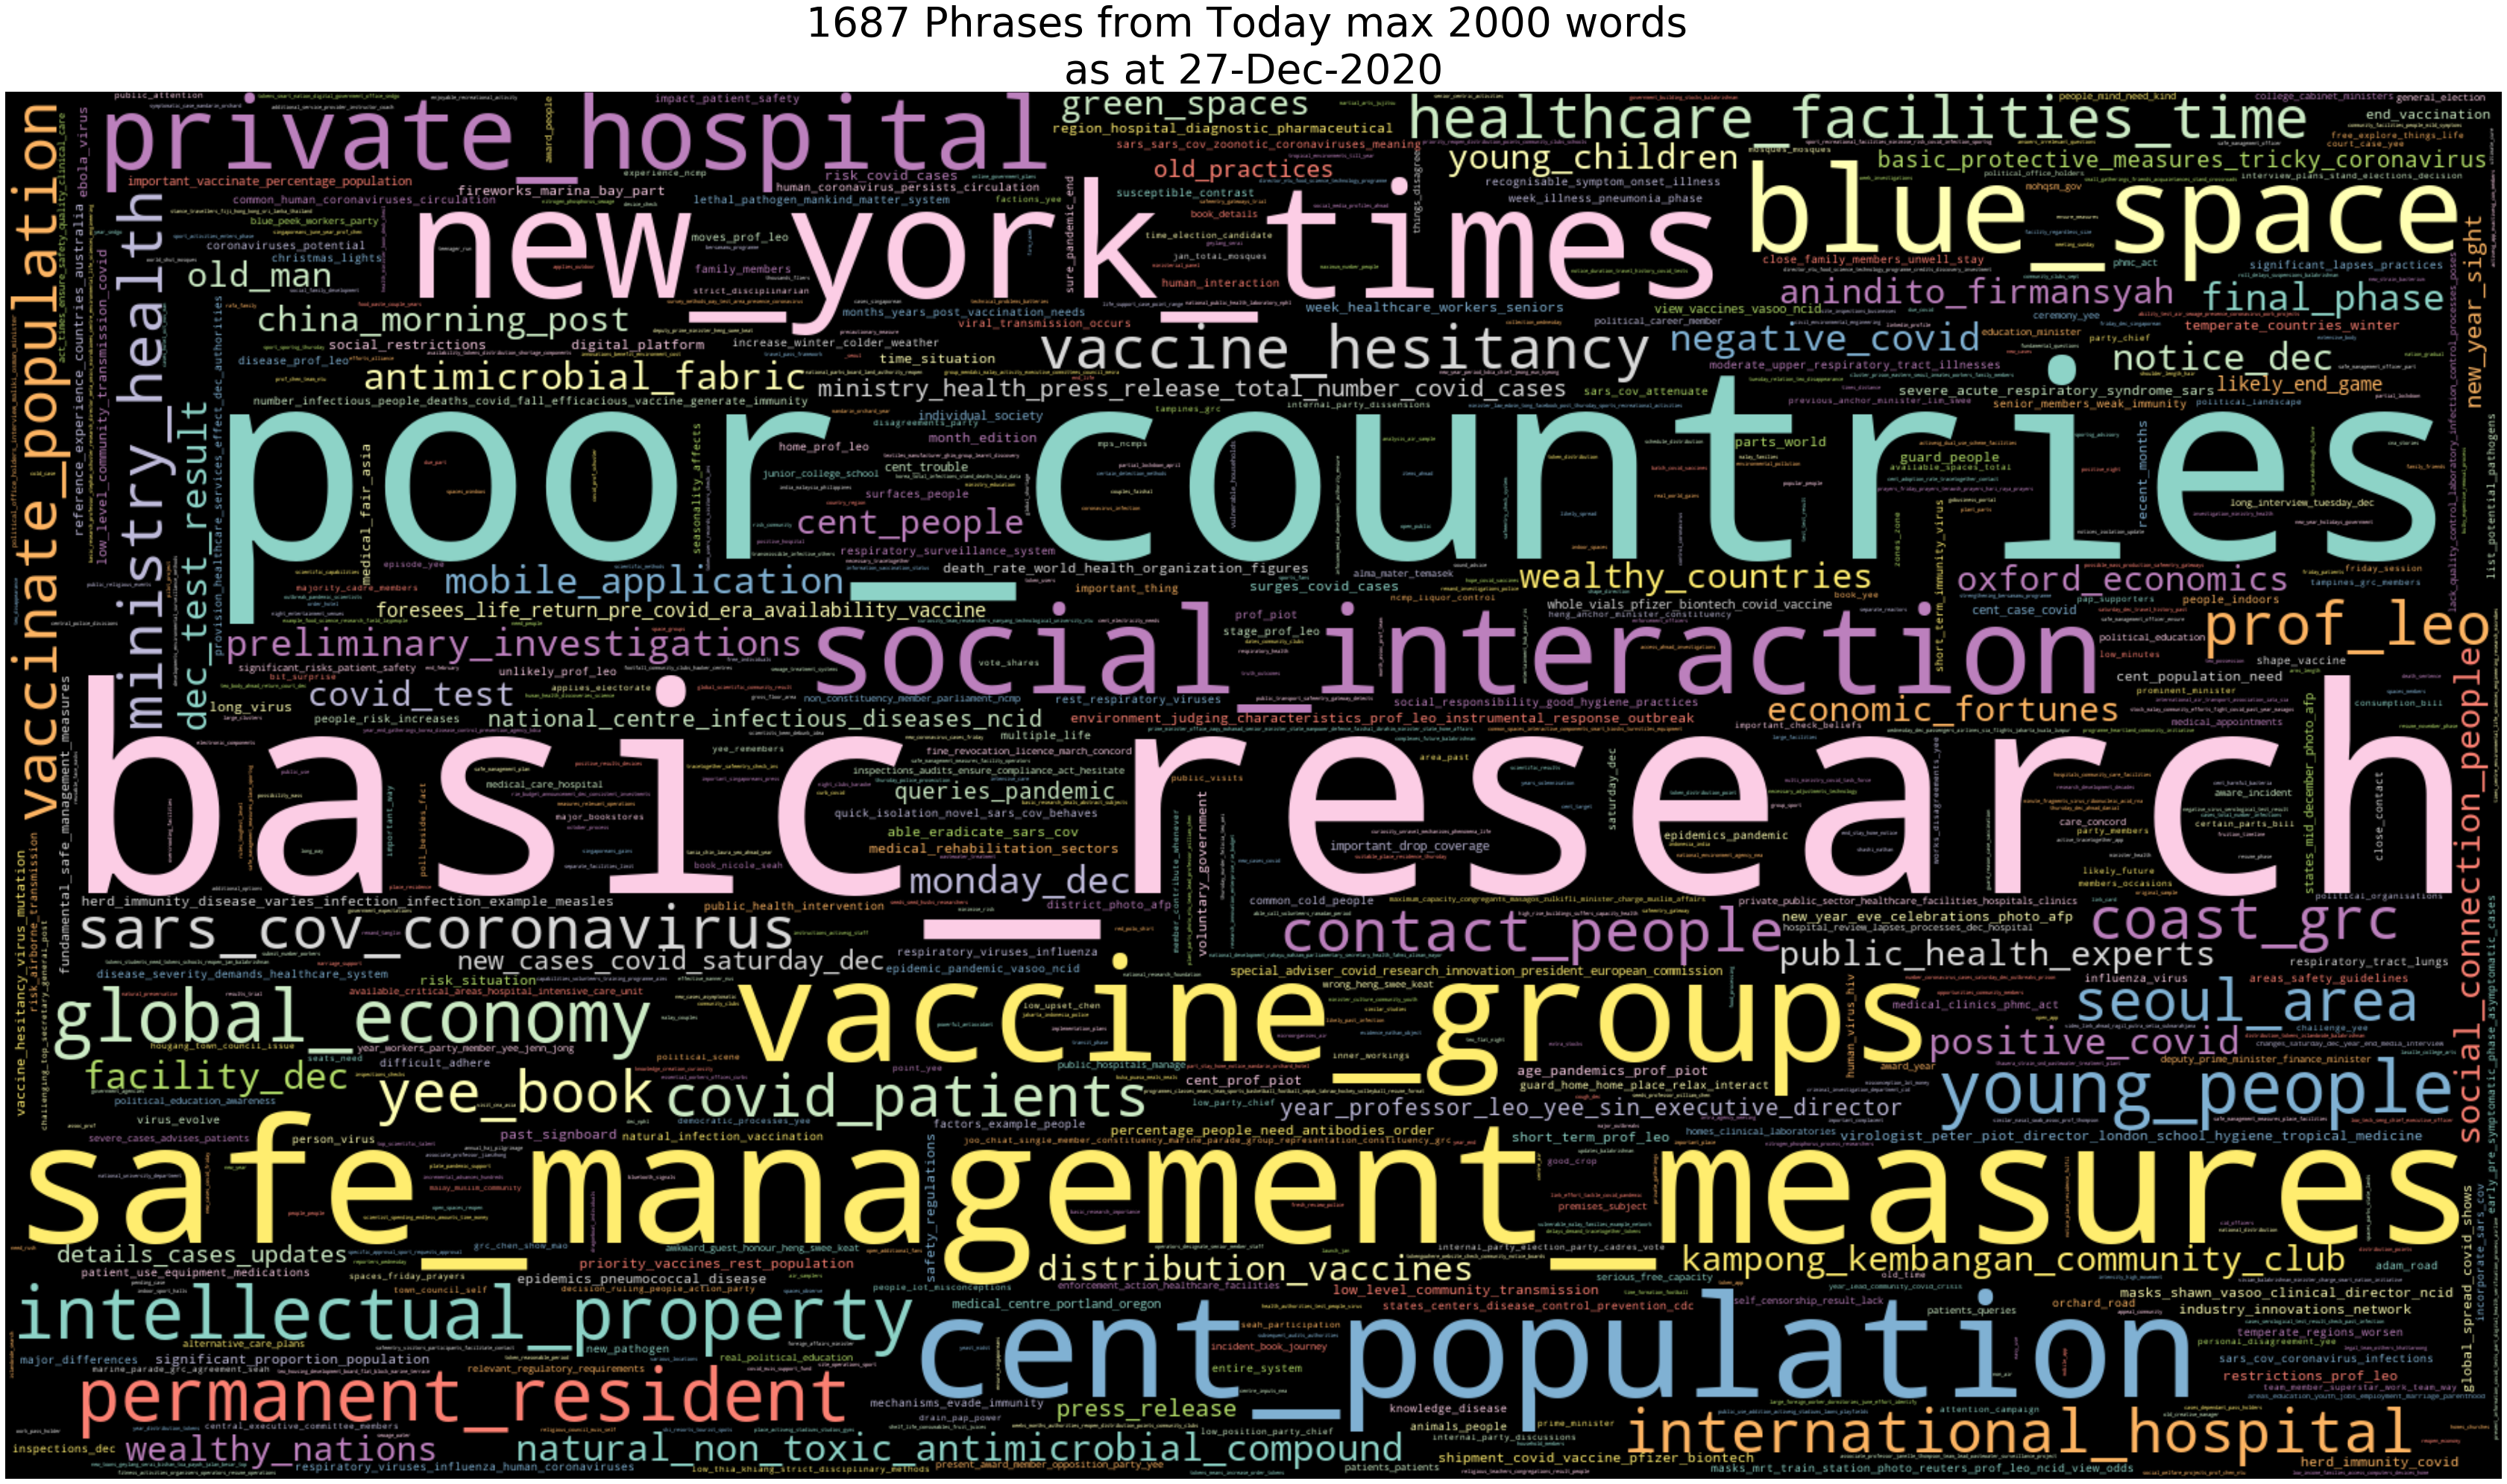

In [28]:
plot_wordcloud(NewNounList, NewNounString, 'Today')